<a href="https://colab.research.google.com/github/gtsagkatakis/FOMO2024/blob/main/train_cnn_VVBs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -r FOMO2024_code
# Clone the repository
!git clone https://github.com/gtsagkatakis/FOMO2024_code

rm: cannot remove 'FOMO2024_code': No such file or directory
Cloning into 'FOMO2024_code'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 25 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (25/25), 7.10 MiB | 26.04 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [2]:
import zipfile
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Specify the name of your ZIP file
zip_file = '/content/FOMO2024_code/15classes_split_20trainperclass.zip'

# Create a directory to extract the contents
extract_dir = 'dataset'

# Unzip the file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Verify the extraction
os.listdir(extract_dir)


['15classes_split_20trainperclass']

In [4]:
# Step 1: Define the directories for training and testing datasets
train_data_dir = '/content/dataset/15classes_split_20trainperclass/train'
test_data_dir = '/content/dataset/15classes_split_20trainperclass/test'



In [5]:
# Step 2: Load the training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    image_size=(128, 128),  # Resize all images to 128x128
    batch_size=32,          # Use a batch size of 32
    label_mode='int',       # Labels are encoded as integers
    shuffle=True            # Shuffle the data
)

Found 300 files belonging to 15 classes.


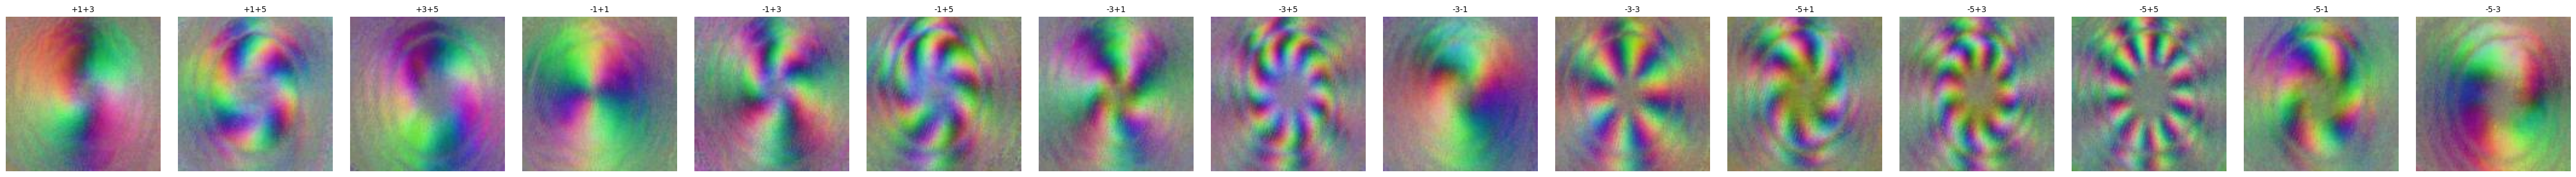

In [6]:
batch_size = 32
img_size = (128, 128)

# Step 1: Extract class names from the dataset
class_names = train_dataset.class_names

# Step 2: Initialize dictionary to track whether an image for each class has been shown
images_shown = {class_name: False for class_name in class_names}

# Step 3: Create a figure with one subplot per class
num_classes = len(class_names)
fig, axes = plt.subplots(1, num_classes, figsize=(num_classes * 3, 3))

# Step 4: Iterate over the dataset and show one image per class
for images, labels in train_dataset.unbatch():
    class_idx = labels.numpy()
    class_name = class_names[class_idx]

    # If an image from this class hasn't been shown yet, display it
    if not images_shown[class_name]:
        ax = axes[class_idx]
        ax.imshow(images.numpy().astype("uint8"))
        ax.axis('off')
        ax.set_title(class_name, size=10)
        images_shown[class_name] = True

    # Break the loop once all classes have an image displayed
    if all(images_shown.values()):
        break

plt.tight_layout()
plt.show()

In [7]:

# Step 3: Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(128, 128, 3)),  # Normalize pixel values
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),         # First convolutional layer
    tf.keras.layers.MaxPooling2D(),                               # First max pooling layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),         # Second convolutional layer
    tf.keras.layers.MaxPooling2D(),                               # Second max pooling layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),        # Third convolutional layer
    tf.keras.layers.MaxPooling2D(),                               # Third max pooling layer
    tf.keras.layers.Flatten(),                                    # Flatten the output
    tf.keras.layers.Dense(128, activation='relu'),                # Fully connected layer
    tf.keras.layers.Dense(15, activation='softmax')               # Output layer (15 classes)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Step 4: Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [9]:
# Step 5: Train the model
history = model.fit(
    train_dataset,
    epochs=10  # Adjust the number of epochs based on your needs
)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.0608 - loss: 2.9233
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.1574 - loss: 2.6868
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.3429 - loss: 2.4720
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.5527 - loss: 1.6828
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7872 - loss: 0.8655
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 979ms/step - accuracy: 0.8463 - loss: 0.4523
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 880ms/step - accuracy: 0.9458 - loss: 0.2138
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9362 - loss: 0.2066
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9842 - loss: 0.0899
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9759 - loss: 0.0675


In [10]:
# Step 6: Load the test dataset



test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    image_size=(128, 128),  # Resize all images to 128x128
    batch_size=32,          # Use a batch size of 32
    label_mode='int',       # Labels are encoded as integers
    shuffle=False           # Do not shuffle the test data
)


Found 1668 files belonging to 15 classes.


In [11]:
# Step 7: Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

53/53 ━━━━━━━━━━━━━━━━━━━━ 16s 304ms/step - accuracy: 0.9264 - loss: 0.3952
Test Accuracy: 89.63%


In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

53/53 ━━━━━━━━━━━━━━━━━━━━ 18s 342ms/step


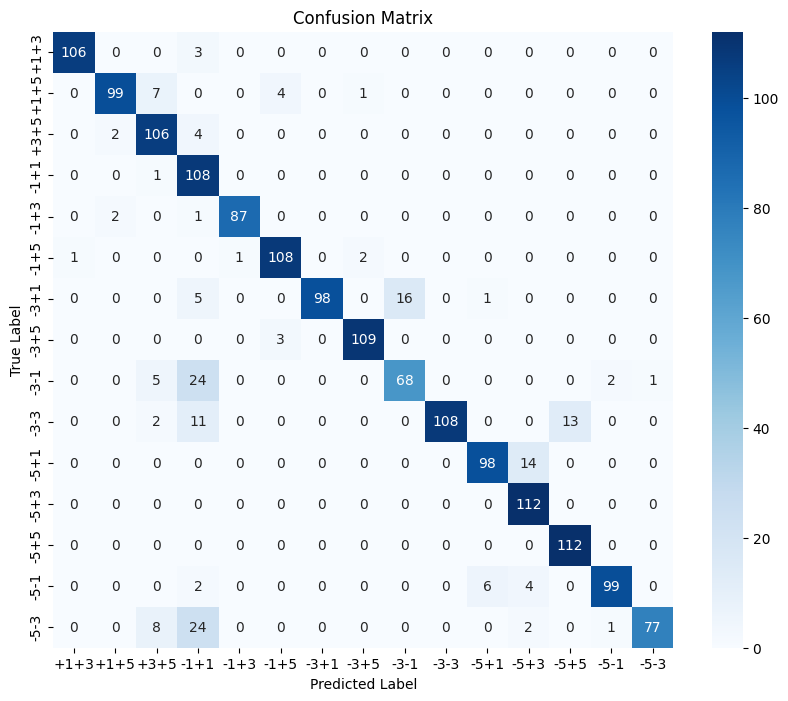

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming your model is already trained and your test dataset is loaded
# The test dataset should be loaded as 'test_dataset'

# Step 1: Run model.predict once on the entire test dataset
y_pred_probs = model.predict(test_dataset, batch_size=32)  # Get the probabilities for each class

# Step 2: Convert probabilities to class predictions
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 3: Extract the true labels from the test dataset
y_true = np.concatenate([labels.numpy() for _, labels in test_dataset], axis=0)

# Step 4: Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Step 5: Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.class_names, yticklabels=test_dataset.class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
